<a href="https://colab.research.google.com/github/keithtyq/AbaloneAgeML/blob/main/AbaloneAgePrediction_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Abalone Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# List the files to ensure they are uploaded
import os
print(os.listdir('/content'))

# Read the uploaded files
data = pd.read_csv('/content/abalone.data', names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
with open('/content/abalone.names', 'r') as f:
    names_info = f.read()

['.config', 'abalone.data', 'abalone.names', 'sample_data']


# Preprocessing

Displaying the dataset

In [ ]:
# Display the head of the data
print(data.head())

#Display the content of the names file
print(names_info)


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Wau

In [ ]:
data.isnull().sum() #check if there are any null values in the dataset
print("Null values present in the dataset: ", data.isnull().sum())
print("")

data.duplicated().sum() #check if there are any duplicated values in the dataset
print("Duplicates: ", data.duplicated().sum())


Null values present in the dataset:  Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Duplicates:  0


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [ ]:
print(data['Sex'].unique()) #check for unexpected values in the 'Sex' column

data['Sex'] = data['Sex'].map({"M": 0, "F": 1, "I": 2})
# 0 is male, 1 is Female, 2 is Infant


data['Sex'].value_counts() #display the 'Sex' category with the 0,1,2 mapping


['M' 'F' 'I']


Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

# Feature Visualisation

In [ ]:
import seaborn as sns

<Axes: xlabel='Rings', ylabel='Count'>

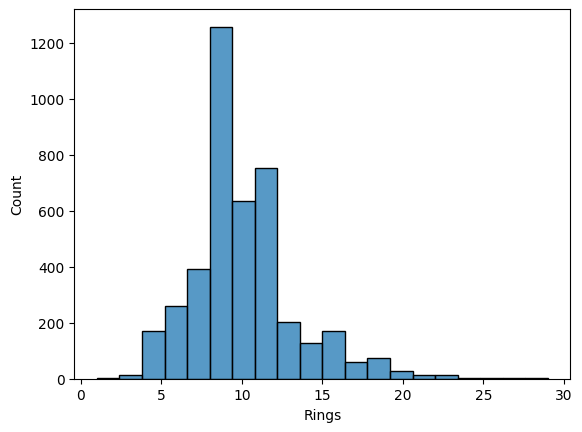

In [ ]:
#Histogram of the number of rings
sns.histplot(data['Rings'],bins=20)


In [ ]:
#Number of abalones who have the same number of rings
data['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


<Axes: xlabel='Length', ylabel='Rings'>

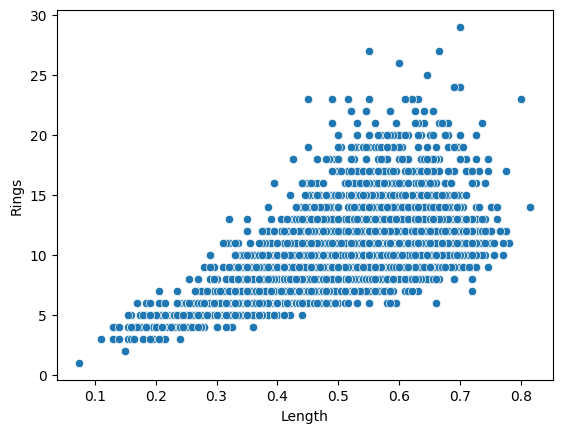

In [ ]:
#Scatter plot of abalone length vs the number of rings
sns.scatterplot(x='Length',y='Rings',data=data)

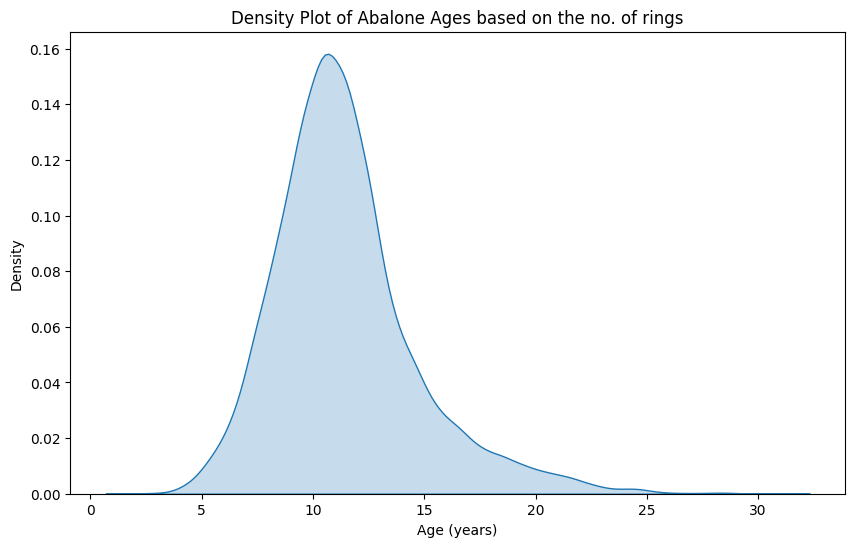

In [ ]:
#Density plot of abalone ages based on the number of rings
data['Age'] = data['Rings'] + 1.5

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Age'], fill=True)
plt.title('Density Plot of Abalone Ages based on the no. of rings')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

# Feature Visualisation

In [ ]:
# Focus on Diameter, Whole weight, and Rings
fdata = data[['Diameter', 'Whole weight', 'Rings']]
fdata.head()

,Diameter,Whole weight,Rings
0,0.365,0.5140,15
1,0.265,0.2255,7
2,0.420,0.6770,9
3,0.365,0.5160,10
4,0.255,0.2050,7


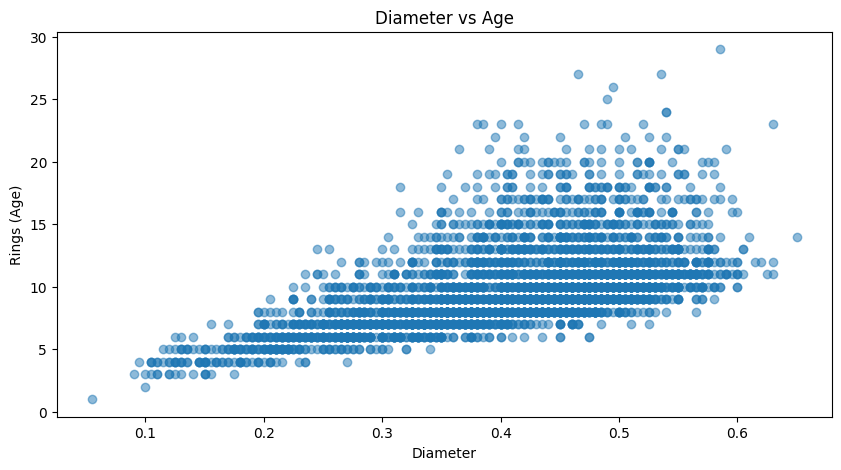

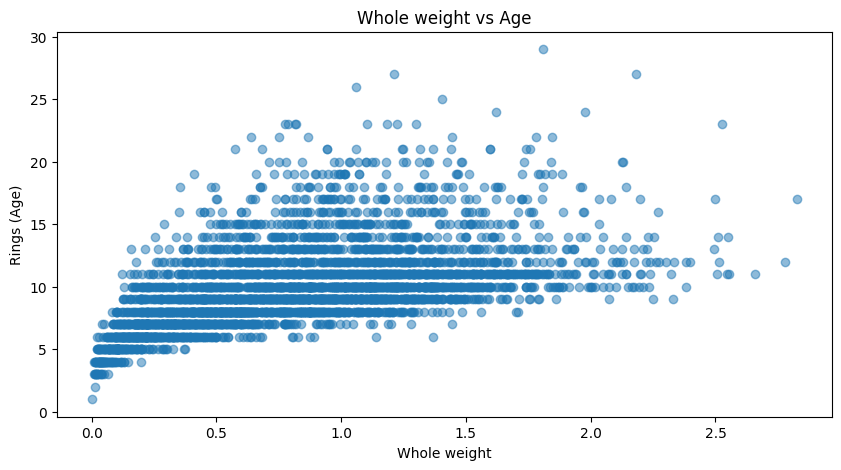

In [ ]:
# Scatter plot: Diameter vs Rings
plt.figure(figsize=(10, 5))
plt.scatter(fdata['Diameter'], fdata['Rings'], alpha=0.5)
plt.xlabel('Diameter')
plt.ylabel('Rings (Age)')
plt.title('Diameter vs Age')
plt.show()

# Scatter plot: Whole weight vs Rings
plt.figure(figsize=(10, 5))
plt.scatter(fdata['Whole weight'], fdata['Rings'], alpha=0.5)
plt.xlabel('Whole weight')
plt.ylabel('Rings (Age)')
plt.title('Whole weight vs Age')
plt.show()

# Pair plot
#sns.pairplot(abalone_data)
#plt.show()

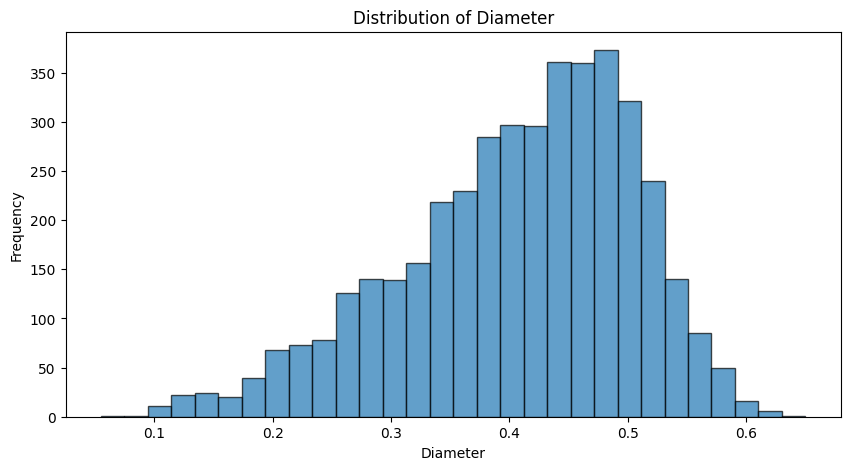

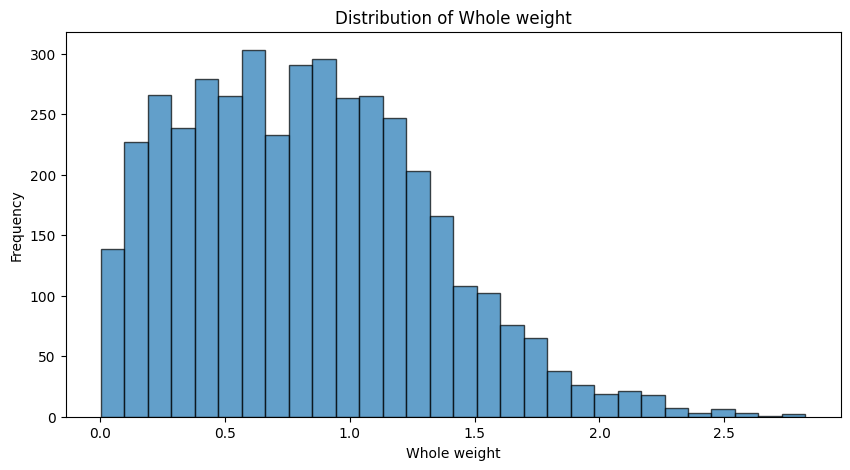

In [ ]:
# Histogram for Diameter
plt.figure(figsize=(10, 5))
plt.hist(fdata['Diameter'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Distribution of Diameter')
plt.show()

# Histogram for Whole weight
plt.figure(figsize=(10, 5))
plt.hist(fdata['Whole weight'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Whole weight')
plt.ylabel('Frequency')
plt.title('Distribution of Whole weight')
plt.show()

                     Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.448765 -0.458245 -0.417928     -0.461238   
Length         -0.448765  1.000000  0.986812  0.827554      0.925261   
Diameter       -0.458245  0.986812  1.000000  0.833684      0.925452   
Height         -0.417928  0.827554  0.833684  1.000000      0.819221   
Whole weight   -0.461238  0.925261  0.925452  0.819221      1.000000   
Shucked weight -0.440927  0.897914  0.893162  0.774972      0.969405   
Viscera weight -0.454658  0.903018  0.899724  0.798319      0.966375   
Shell weight   -0.445549  0.897706  0.905330  0.817338      0.955355   
Rings          -0.351822  0.556720  0.574660  0.557467      0.540390   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.440927       -0.454658     -0.445549 -0.351822  
Length                0.897914        0.903018      0.897706  0.556720  
Diameter              0.893162        0.899724      0.905330

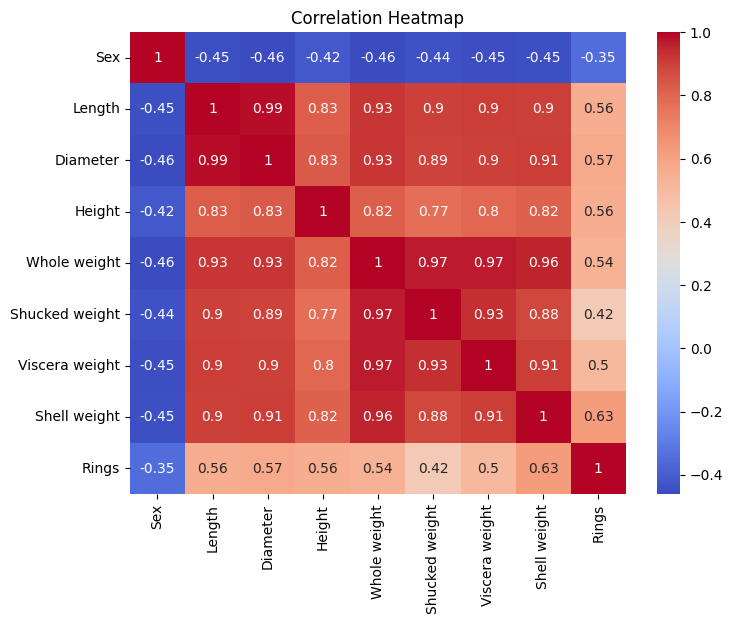

In [ ]:
# Correlation analysis
CA = data.drop('Age', axis=1)
correlation_matrix = CA.corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Training the model: Linear Regression

Mean Squared Error: 6.086571496871506
Root Mean Squared Error: 2.47
R^2 Score: 0.38485602075911396
Accuracy: 38.49%


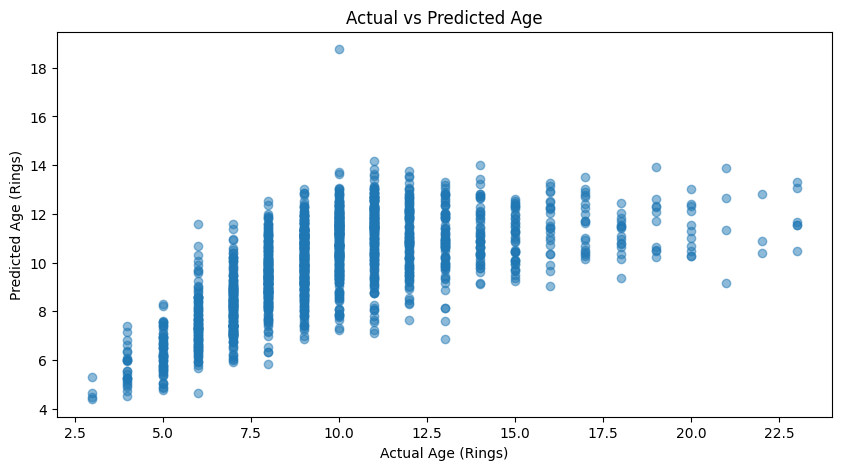

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data.drop('Rings', axis=1)
X = X.iloc[:, :int(X.shape[1] / 2)]
y = data['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mseT = mean_squared_error(y_test, y_pred)
rmseT = mseT ** 0.5
r2T = r2_score(y_test, y_pred)
accuracy_percentage = r2T * 100
print(f'Mean Squared Error: {mseT}')
print(f'Root Mean Squared Error: {rmseT:.2f}')
print(f'R^2 Score: {r2T}')
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Age (Rings)')
plt.ylabel('Predicted Age (Rings)')
plt.title('Actual vs Predicted Age')
plt.show()

In [ ]:
X = data.drop('Rings',axis=1)
y = data['Rings']

#Splitting the data into 40% for testing, 60% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

decisionTree = DecisionTreeRegressor(max_depth=2)  # Limit depth

decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print("R2: ", r2)
accuracy_percentage = r2 * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Mean Squared Error:  1.2291952843619691
Root Mean Squared Error: 1.11
R2:  0.8789513678693142
Accuracy: 87.90%


# Training the model: Random Forest


1. Random Forest Model

In [ ]:
# Separate features and target variable
X = data.drop(["Rings", "Age"], axis=1)
y = data["Age"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mser = mean_squared_error(y_test, y_pred)
rmser = np.sqrt(mser)
r2r = r2_score(y_test, y_pred)
accuracy_percentage = r2r * 100

print(f"Root Mean Squared Error: {rmser}")
print(f"R² Score: {r2r}")
print(f"Accuracy: {accuracy_percentage:.2f}%")

Root Mean Squared Error: 2.19057170299557
R² Score: 0.5274432757372087
Accuracy: 52.74%


# Training the model: K-Nearest Neighbors


2. K-Nearest Neighbors (KNN) regressor




In [ ]:
# Separate features and target variable
X = data.drop(["Rings", "Age"], axis=1)
y = data["Age"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the kNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
msek = mean_squared_error(y_test, y_pred)
rmsek = np.sqrt(msek)
r2k = r2_score(y_test, y_pred)
accuracy_percentage = r2k * 100

print(f"Root Mean Squared Error: {rmsek}")
print(f"R² Score: {r2k}")
print(f"Accuracy: {accuracy_percentage:.2f}%")

Root Mean Squared Error: 2.211316407749785
R² Score: 0.5184506761060917
Accuracy: 51.85%


# Training the model: Multi layer perceptron

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Assuming X and y are your features and target variable
X = data.drop('Rings', axis=1)
y = data['Rings']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Feature Selection with SelectKBest and mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k=3)  # Reduce number of features
selector.fit(X_train_noisy, y_train)
X_train_selected = selector.transform(X_train_noisy)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Initialize a simpler MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=1000)

# Define a simplified parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (30,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'learning_rate': ['constant']
}

# Perform Grid Search
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Evaluate the model with the best parameters
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_selected)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display predictions vs actual values
results = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': y_pred})
print(results.head(10))


Selected Features: Index(['Length', 'Diameter', 'Age'], dtype='object')
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 4.110133472372706
Mean Squared Error: 2.0197036828870067
R^2 Score: 0.7958771106168419
      Actual Age  Predicted Age
866            9       9.855600
1483           8       9.505438
599           16      13.004590
1702           9       9.850997
670           14      11.458751
2430          11      10.615649
1590           7       8.830530
949            6       8.431520
4026           7       7.549637
3668          10      10.200760


# Fine Tuning: Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Update feature list for polynomial features
feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Check feature importances again


In [ ]:
feature_names = X.columns
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Feature Importances:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importances:
    Feature  Coefficient
2  Diameter     2.163828
3    Height     0.767774
0       Sex    -0.294817
1    Length    -1.081339


Mean Squared Error: 6.260977022232768
R^2 Score: 0.3672295936437061
Accuracy: 36.72%


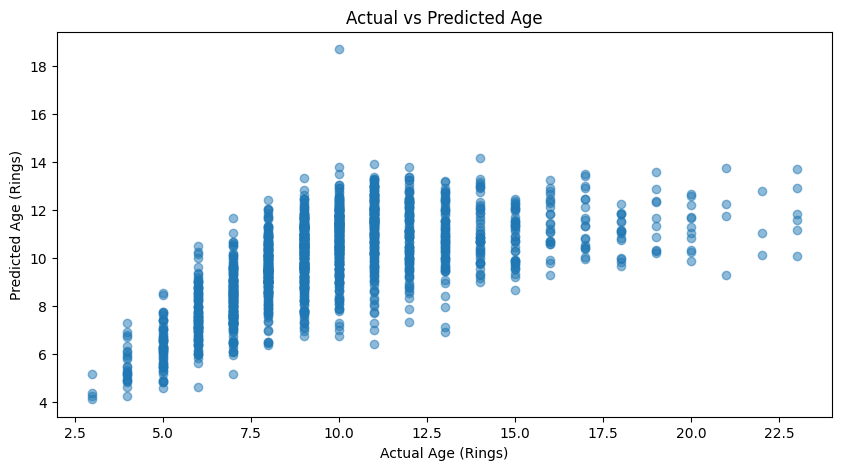

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features based on selection
features = ['Diameter', 'Height']
X = data[features]
y = data['Rings']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mseT = mean_squared_error(y_test, y_pred)
r2T = r2_score(y_test, y_pred)
accuracy_percentage = r2T * 100
print(f'Mean Squared Error: {mseT}')
print(f'R^2 Score: {r2T}')
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Age (Rings)')
plt.ylabel('Predicted Age (Rings)')
plt.title('Actual vs Predicted Age')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validated R^2 Score: {cv_scores.mean()}")


Cross-Validated R^2 Scores: [0.99888186 1.         0.99926799 0.99969569 1.        ]
Mean Cross-Validated R^2 Score: 0.9995691090332629


# Fine Tuning: Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature ranking:")
for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance']), start=1):
    print(f"{i}. feature {feature} ({importance})")

# Select top features
top_features = importance_df['Feature'][:5]
X_top = data[top_features]

# Split the data again using the top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.4, random_state=42)

# Train the model using the top features
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train_top)

# Make predictions with the top features
y_pred_top = rf_model_top.predict(X_test_top)

# Evaluate the model with the top features
mse_top = mean_squared_error(y_test_top, y_pred_top)
rmse_top = np.sqrt(mse_top)
r2_top = r2_score(y_test_top, y_pred_top)
accuracy_percentage_top = r2_top * 100

print(f"Top Features: {top_features}")
print(f"Root Mean Squared Error (Top Features): {rmse_top}")
print(f"R² Score (Top Features): {r2_top}")
print(f"Accuracy (Top Features): {accuracy_percentage_top:.2f}%")


Root Mean Squared Error: 2.176658203203413
R² Score: 0.5211665013076245
Accuracy: 52.12%
Feature ranking:
1. feature Shell weight (0.48525321853780823)
2. feature Shucked weight (0.16603562367160488)
3. feature Whole weight (0.0867155799641663)
4. feature Viscera weight (0.06989165502952277)
5. feature Diameter (0.06273543012243515)
6. feature Height (0.055832551330610956)
7. feature Length (0.048312329078775605)
8. feature Sex (0.025223612265076044)
Top Features: 7      Shell weight
5    Shucked weight
4      Whole weight
6    Viscera weight
2          Diameter
Name: Feature, dtype: object
Root Mean Squared Error (Top Features): 2.2132816944002416
R² Score (Top Features): 0.5049176611687825
Accuracy (Top Features): 50.49%


In [ ]:
# Train the final Random Forest model with the best parameters
final_rf_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=20,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
final_rf_model.fit(X_train, y_train)

# Make predictions
final_y_pred = final_rf_model.predict(X_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_y_pred)
final_accuracy_percentage = final_r2 * 100

print(f"Root Mean Squared Error (Final RF Model): {final_rmse}")
print(f"R² Score (Final RF Model): {final_r2}")
print(f"Accuracy (Final RF Model): {final_accuracy_percentage:.2f}%")



Root Mean Squared Error (Final RF Model): 2.12725190476155
R² Score (Final RF Model): 0.542657151703673
Accuracy (Final RF Model): 54.27%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable
X = data.drop('Rings', axis=1)
y = data['Rings']

# Splitting the data into training and testing sets with increased test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Add noise to the training data
noise = np.random.normal(0, 1, X_train.shape)
X_train_noisy = X_train + noise

# Define parameter grid for GridSearchCV with reduced complexity
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_noisy, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score from Grid Search:", grid_search.best_score_)

# Get the best model
best_decision_tree = grid_search.best_estimator_

# Make predictions on test data
y_pred = best_decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print("R²:", r2)
accuracy_percentage = r2 * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best R² Score from Grid Search: 0.574090314587224
Mean Squared Error: 2.0201883219663253
Root Mean Squared Error: 1.42
R²: 0.7958281301995574
Accuracy: 79.58%


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_tree, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validated R^2 Score: {cv_scores.mean()}")


Cross-Validated R^2 Scores: [0.99875763 1.         0.99942485 0.99969569 1.        ]
Mean Cross-Validated R^2 Score: 0.9995756335884343


In [ ]:
# Display predictions vs actual values
results = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': y_pred})
print(results.head(10))

      Actual Age  Predicted Age
866            9       9.442478
1483           8       9.442478
599           16      12.433476
1702           9       9.442478
670           14      11.240310
2430          11       9.565217
1590           7       8.358333
949            6       8.358333
4026           7       6.425000
3668          10      10.642132


# Fine Tuning: K-Nearest Neighbor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score  # Import r2_score

# Discretize the age into bins for classification
bins = [0, 5, 10, 15, 20, 25, 30, 35]
age_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
y_binned = pd.cut(y, bins=bins, labels=age_labels, include_lowest=True)

# Encode the categorical labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binned)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection with SelectKBest and mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Initialize KNN model with best parameters
knn_model = KNeighborsClassifier(
    n_neighbors=9,
    weights='uniform',
    algorithm='auto',
    p=1
)

# Train the model
knn_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate mean squared error (MSE) for classification
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

try:
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 Score: {r2:.4f}")
except ValueError as e:
    print(f"Error calculating R^2 Score: {e}")

# Cross-validation
cv_scores = cross_val_score(knn_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Cross-Validated Accuracy:", cv_scores.mean())


Selected Features: Index(['Length', 'Diameter', 'Height', 'Viscera weight', 'Shell weight'], dtype='object')
Accuracy: 71.63%
Mean Squared Error (MSE): 4.5990
R^2 Score: 0.1426


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy Scores: [0.71713147 0.70459082 0.72055888 0.70858283 0.73453094]
Mean Cross-Validated Accuracy: 0.7170789894314955


# Fine Tuning: Multi layer perceptron

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Assuming X and y are your features and target variable
X = data.drop('Rings', axis=1)
y = data['Rings']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection with SelectKBest and mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k=4)
selector.fit(X_train_noisy, y_train)
X_train_selected = selector.transform(X_train_noisy)
X_test_selected = selector.transform(X_test)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Initialize a simpler MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=1000)

# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (15,), (20,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.1],
    'learning_rate': ['constant']
}

# Perform Grid Search
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Evaluate the model with the best parameters
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_selected)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display predictions vs actual values
results = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': y_pred})
print(results.head(10))


Selected Features: Index(['Length', 'Diameter', 'Whole weight', 'Age'], dtype='object')
Best Parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 4.028410274967183
Mean Squared Error: 1.7602639732594039
R^2 Score: 0.8220975822625711
      Actual Age  Predicted Age
866            9       9.746137
1483           8       9.357426
599           16      13.250916
1702           9       9.958485
670           14      11.524077
2430          11      10.238022
1590           7       8.644773
949            6       8.206422
4026           7       7.379773
3668          10      10.218638
